다른 열값이 있는 경우

In [1]:
import pandas as pd

# 두 데이터프레임 생성 (예시)
data1 = {
    '기준일시': ['2022-04-01', '2022-04-02', '2022-04-03'],
    '열1': [10, 20, 30],
    '열2': [100, 200, 300],
    '열3': ['A', 'B', 'C']
}
df1 = pd.DataFrame(data1)

data2 = {
    '기준일시': ['2022-04-01', '2022-04-02', '2022-04-03'],
    '열1': [10, 20, 40],
    '열2': [100, 200, 300],
    '열3': ['A', 'B', 'D']
}
df2 = pd.DataFrame(data2)

# '기준일시'를 기준으로 두 데이터프레임 조인
merged = pd.merge(df1, df2, on='기준일시', suffixes=('_df1', '_df2'))

# 다른 열 값이 있는지 확인하는 함수
def check_different(row):
    cols = row.index[1:]
    return any(row[col] != row[col.replace('_df1', '_df2')] for col in cols)

# apply를 사용하여 다른 열 값이 있는 행들 추출
different_values = merged[merged.apply(check_different, axis=1)]

# 결과 출력
if not different_values.empty:
    print("다른 열 값이 있는 행들:")
    print(different_values)


다른 열 값이 있는 행들:
         기준일시  열1_df1  열2_df1 열3_df1  열1_df2  열2_df2 열3_df2
2  2022-04-03      30     300      C      40     300      D


절대값 차이 1 넘는 경우

In [8]:
# 두 데이터프레임 생성 (예시)
data1 = {
    '기준일시': ['2022-04-01', '2022-04-02', '2022-04-03'],
    '현재수요': [100, 200, 300]
}
df1 = pd.DataFrame(data1)

data2 = {
    '기준일시': ['2022-04-01', '2022-04-02', '2022-04-03'],
    '현재수요': [100, 250, 301]
}
df2 = pd.DataFrame(data2)

# '기준일시'를 기준으로 두 데이터프레임 조인
merged = pd.merge(df1, df2, on='기준일시', suffixes=('_df1', '_df2'))

# 현재수요값의 차이 계산
merged['차이'] = merged['현재수요_df2'] - merged['현재수요_df1']

# 차이의 절대값이 1 이상인 행 추출
difference_over_1 = merged[abs(merged['차이']) >= 1]

# 결과 출력
print("차이의 절대값이 1 이상인 행들:")
print(difference_over_1)

차이의 절대값이 1 이상인 행들:
         기준일시  현재수요_df1  현재수요_df2  차이
1  2022-04-02       200       250  50
2  2022-04-03       300       301   1


outer로 합치기

In [4]:
import pandas as pd

# 첫번째 데이터프레임 생성 (예시)
data1 = {
    '기준일시': ['2022-04-01', '2022-04-02', '2022-04-03'],
    '현재수요': [100, 200, 300]
}
df1 = pd.DataFrame(data1)

# 두번째 데이터프레임 생성 (예시)
data2 = {
    '기준일시': ['2022-04-02', '2022-04-03', '2022-04-04'],
    '현재수요': [150, 250, 350]
}
df2 = pd.DataFrame(data2)

# 첫번째 데이터프레임을 기준으로 두 데이터프레임 합치기
merged = pd.merge(df1, df2, on='기준일시', how='outer', suffixes=('_df1', '_df2'))

# 같은 값이 있는 경우 첫번째 데이터프레임의 값으로 채우기
merged['현재수요'] = merged['현재수요_df1'].combine_first(merged['현재수요_df2'])

# 기준일시 열과 불필요한 열 제거
merged.drop(['현재수요_df1', '현재수요_df2'], axis=1, inplace=True)

# 결과 출력
print(merged)


         기준일시   현재수요
0  2022-04-01  100.0
1  2022-04-02  200.0
2  2022-04-03  300.0
3  2022-04-04  350.0


히트맵

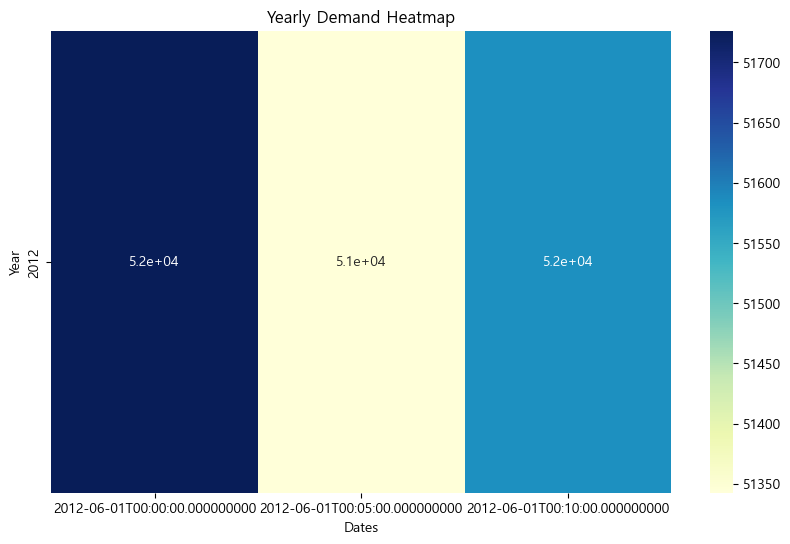

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 프레임 생성 (예시)
data = {
    '기준일시': ['2012-06-01 00:00:00', '2012-06-01 00:05:00', '2012-06-01 00:10:00'],
    '현재수요(MW)': [51726.33, 51342.53, 51583.17]
}
df = pd.DataFrame(data)

# '기준일시' 열을 datetime 형식으로 변환
df['기준일시'] = pd.to_datetime(df['기준일시'])

# '년도' 열 추가
df['년도'] = df['기준일시'].dt.year

# 년도별 전력수요 피벗 테이블 생성
pivot_table = df.pivot_table(index='년도', columns='기준일시', values='현재수요(MW)')

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Yearly Demand Heatmap')
plt.xlabel('Dates')
plt.ylabel('Year')
plt.show()


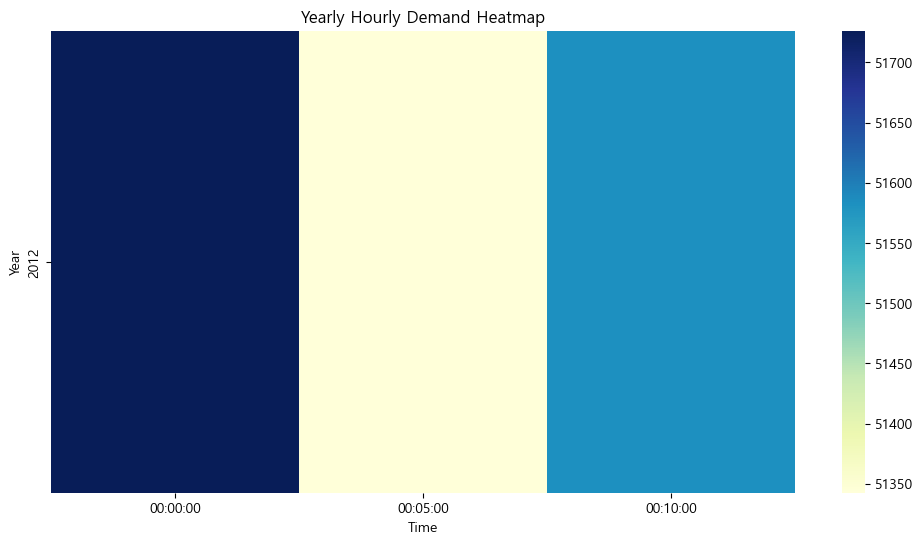

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 프레임 생성 (예시)
data = {
    '기준일시': ['2012-06-01 00:00:00', '2012-06-01 00:05:00', '2012-06-01 00:10:00'],
    '현재수요(MW)': [51726.33, 51342.53, 51583.17]
}
df = pd.DataFrame(data)

# '기준일시' 열을 datetime 형식으로 변환
df['기준일시'] = pd.to_datetime(df['기준일시'])

# '년도' 열과 '시간' 열 추가
df['년도'] = df['기준일시'].dt.year
df['시간'] = df['기준일시'].dt.time

# 년도별 시간별 전력수요 피벗 테이블 생성
pivot_table = df.pivot_table(index='년도', columns='시간', values='현재수요(MW)')

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Yearly Hourly Demand Heatmap')
plt.xlabel('Time')
plt.ylabel('Year')
plt.show()


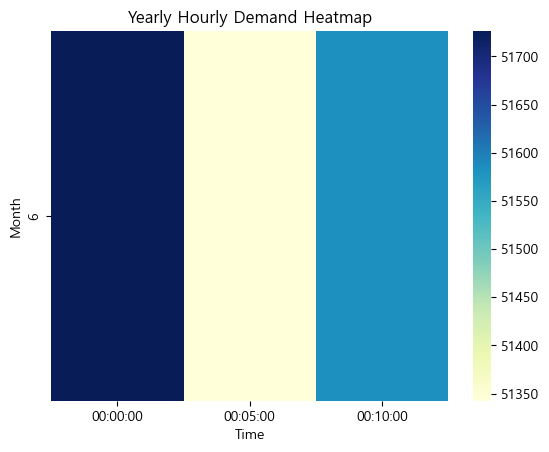

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 생성 (예시)
data = {
    '기준일시': ['2012-06-01 00:00:00', '2012-06-01 00:05:00', '2012-06-01 00:10:00'],
    '현재수요(MW)': [51726.33, 51342.53, 51583.17]
}
df = pd.DataFrame(data)

# '기준일시' 열을 datetime 형식으로 변환
df['기준일시'] = pd.to_datetime(df['기준일시'])

# '년도', '월', '시간' 열 추가
df['년도'] = df['기준일시'].dt.year
df['월'] = df['기준일시'].dt.month
df['시간'] = df['기준일시'].dt.time

# 년도별로 데이터프레임 분할
df_yearly = df.groupby('년도')

# 피벗 테이블 생성
pivot_table = pd.pivot_table(df, values='현재수요(MW)', index='월', columns='시간', aggfunc='mean')

# 히트맵 그리기
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Yearly Hourly Demand Heatmap')
plt.xlabel('Time')
plt.ylabel('Month')
plt.show()




중복값

In [16]:
import pandas as pd

# 주어진 데이터프레임 생성 (예시)
data = {
    '기준일시': ['2012-06-01 00:00:00', '2012-06-01 00:05:00', '2012-06-01 00:00:00'],
    '현재수요(MW)': [51726.33, 51342.53, 51583.17]
}
df = pd.DataFrame(data)

# 중복된 기준일시 값 확인
duplicates = df[df.duplicated(subset=['기준일시'], keep=False)]

# 결과 출력
if duplicates.empty:
    print("중복된 기준일시 값이 없습니다.")
else:
    print("중복된 기준일시 값이 있습니다:")
    print(duplicates)

중복된 기준일시 값이 있습니다:
                  기준일시  현재수요(MW)
0  2012-06-01 00:00:00  51726.33
2  2012-06-01 00:00:00  51583.17


In [1]:
import pandas as pd

# 첫 번째 데이터프레임 예시
data1 = {
    '기준일시': ['2022-01-01 00:00:00', '2022-01-01 00:05:00', '2022-01-01 00:10:00'],
    '값1': [1, 2, 3]
}
df1 = pd.DataFrame(data1)

# 두 번째 데이터프레임 예시
data2 = {
    '기준일시': ['2022-01-01 00:05:00', '2022-01-01 00:10:00', '2022-01-01 00:15:00'],
    '값2': [4, 5, 6]
}
df2 = pd.DataFrame(data2)

# 데이터프레임 병합
merged = pd.merge(df1, df2, on='기준일시', how='outer')

# 기준일시가 있는 행과 없는 행 구분
existing_rows = merged[merged['값1'].notnull() & merged['값2'].notnull()]  # 기준일시가 있는 행
missing_rows_df1 = merged[merged['값1'].notnull() & merged['값2'].isnull()]  # df1에만 있는 행
missing_rows_df2 = merged[merged['값1'].isnull() & merged['값2'].notnull()]  # df2에만 있는 행

# 결과 출력
print("기준일시가 있는 행:")
print(existing_rows)
print("\n기준일시가 없는 행 (df1에만 있는 행):")
print(missing_rows_df1)
print("\n기준일시가 없는 행 (df2에만 있는 행):")
print(missing_rows_df2)


기준일시가 있는 행:
                  기준일시   값1   값2
1  2022-01-01 00:05:00  2.0  4.0
2  2022-01-01 00:10:00  3.0  5.0

기준일시가 없는 행 (df1에만 있는 행):
                  기준일시   값1  값2
0  2022-01-01 00:00:00  1.0 NaN

기준일시가 없는 행 (df2에만 있는 행):
                  기준일시  값1   값2
3  2022-01-01 00:15:00 NaN  6.0


In [2]:
import pandas as pd

# 예시 데이터프레임 생성
data = {
    'A': [1, 2, None, 4, None],
    'B': ['apple', 'banana', 'cherry', None, 'orange'],
    'C': [True, False, True, True, None]
}
df = pd.DataFrame(data)

# 각 열의 null 여부 확인
null_check = df.notnull()

print(null_check)

       A      B      C
0   True   True   True
1   True   True   True
2  False   True   True
3   True  False   True
4  False   True  False


In [3]:
# 데이터프레임 생성
data = {
    '열1': [1, 2, 3, 4, 5],
    '열2': [1, 2, 3, 6, 5]
}
df = pd.DataFrame(data)

# 조건 인덱싱을 사용하여 다른 값(불일치하는 값) 추출
result = df[df['열1'] != df['열2']]
print(result)

   열1  열2
3   4   6


In [1]:
import pandas as pd

# 데이터프레임 생성
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, None, 5]}
df = pd.DataFrame(data)

# 'A' 칼럼의 NaN 값을 갖고 있는 행 추출
nan_rows = df[df['A'].isna()]

print(nan_rows)

    A    B
2 NaN  3.0
